In [134]:
# Yapay sinir ağları

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# test eğitim ve bölünmesi 
from sklearn.model_selection import train_test_split

In [135]:
veri = pd.read_csv("../data/data1/mnist.csv")
print("verinin boyutu: ", veri.shape)
veri.head()

verinin boyutu:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# sadece etiketi bir ve sıfır olanları alalım
label_filter0 = 0
label_filter1 = 1

# etiketi sıfır ve bir olanları filtrele ve birleştir

veri = pd.concat([veri[veri['label'] == label_filter0], veri[veri['label'] == label_filter1]], axis=0)
veri.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# label'ları ayıralım
Y_veri = veri["label"]

# x eğitim veri seti oluşturalım
X_veriler = veri.drop(["label"], axis=1)
print("X veri:", X_veriler.shape)
print('Y veri:', Y_veri.shape)

X veri: (8816, 784)
Y veri: (8816,)


In [138]:
# resmin boyutunu kullanacağız 
resim_boyutu = int(np.sqrt(X_veriler.shape[1]))
resim_boyutu

28

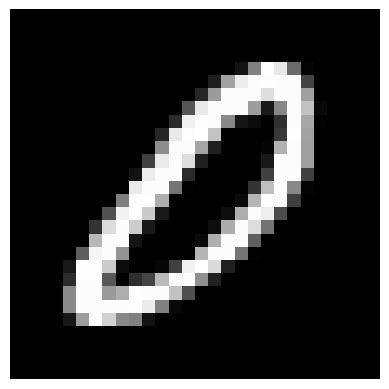

In [139]:
# verimizi görselleştirelim 0 sınıfı
resim1 = X_veriler.iloc[900].values
resim1 = resim1.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim1, cmap='gray')
plt.axis('off')
plt.show()

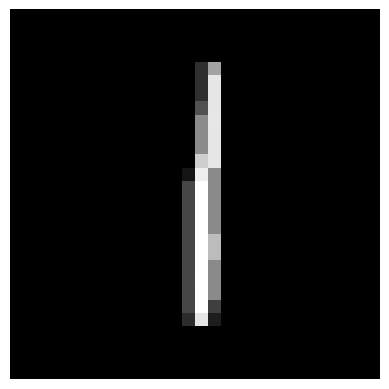

In [140]:
# verimizi görselleştirelim 1 sınıfı
resim2 = X_veriler.iloc[8000].values
resim2 = resim2.reshape((resim_boyutu, resim_boyutu))
plt.imshow(resim2, cmap='gray')
plt.axis('off')
plt.show()

In [141]:
# eğitim test bölünmesi

X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veriler, Y_veri, test_size=0.15, random_state=42)
print("X eğitim: ", X_egitim.shape)
print("X test: ", X_test.shape)

X eğitim:  (7493, 784)
X test:  (1323, 784)


In [142]:
 # girdileri düzeltmek için tersçapraz işlemi
 x_egitim = X_egitim.T
 x_test = X_test.T
 y_egitim = Y_egitim.values.reshape(-1,1).T
 y_test = Y_test.values.reshape(-1,1).T
 print("x egitim: ", x_egitim.shape)
 print("x test: ", x_test.shape)
 print("y egitim: ", y_egitim.shape)
 print("y test: ", y_test.shape)
 
 # T işlemi bir matrisin transpozunu alır, yani satırlarını sütunlara ve sütunları satırlara dönüştürür. Bu işlem, veri manipülasyonunda ve matris işlemlerinde sıkça kulanılır.
 

x egitim:  (784, 7493)
x test:  (784, 1323)
y egitim:  (1, 7493)
y test:  (1, 1323)


2 Katmanlı Sinir Ağı
* Parametrelerin İlklendirilmesi
* İleri Yayılma
* Kayıp ve Maliyet Fonksiyonları
* Geriye Yayılma
* Parametrelerin Güncellenmesi
* Tahmin
* 2 Katmanlı Sinir Ağı oluşturma

In [143]:
# ilklendirme 
def layerSayisiniParametreleriIlklendir(x_train, y_train):
  parameters = {
                "weight1": np.random.randn(3, x_train.shape[0]) * 0.1,
                "bias1": np.zeros((3,1)),
                "weight2": np.random.randn(y_train.shape[0], 3) * 0.1,
                "bias2": np.zeros((y_train.shape[0], 1))}
  return parameters

In [144]:
# sigmoid
def sigmoid(z):
  y_head = 1/(1+ np.exp(-z))
  return y_head
sigmoid(0)

0.5

In [145]:
def ileriYayilmaNN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
  
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
  
    return A2, cache


In [146]:
# Kayıp ve Maliyet Fonksiyonları

#maliyet hesabı
def maliyetHesaplaNN(A2, Y, parameters):
  logprobs = np.multiply(np.log(A2), Y)
  cost = -np.sum(logprobs)/Y.shape[1]
  return cost

In [147]:
# Geriye Yayılma
def geriyeYayilmaNN(parameters, cache, X,Y):
  
  dZ2 = cache["A2"]-Y
  dW2 = np.dot(dZ2, cache["A1"].T)/X.shape[1]
  db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[1]
  dZ1 = np.dot(parameters["weight2"].T, dZ2)*(1 - np.power(cache["A1"], 2))
  dW1 = np.dot(dZ1, X.T) / X.shape[1]
  db1 = np.sum(dZ1, axis=1, keepdims=True) / X.shape[1]
  grads = {
    "dweight1" : dW1,
    "dbias1" : db1,
    "dweight2": dW2,
    "dbias2": db2
  }
  
  return grads

In [148]:
def parametreGuncelleNN(parameters, grads, learning_rate = 0.01):
    parameters = {
        "weight1": parameters["weight1"] - learning_rate * grads["dweight1"],
        "bias1": parameters["bias1"] - learning_rate * grads["dbias1"],
        "weight2": parameters["weight2"] - learning_rate * grads["dweight2"],
        "bias2": parameters["bias2"] - learning_rate * grads["dbias2"]
    }
    return parameters


In [149]:
# tahmin

def tahminNN(parameters, x_test):
  
  #x test ileri yayılma girdisidir.
  A2, cache = ileriYayilmaNN(x_test, parameters)
  Y_prediction = np.zeros((1, x_test.shape[1]))
  
  # eğer z 0.5'den büyükse, 1 sınıfına ait resimler
  # eğer z 0.5'den güçükse, 0 sınıfına ait resimler
  
  for i in range(A2.shape[1]):
    if A2[0, i] <= 0.5:
      Y_prediction[0, i] = 0
    else:
      Y_prediction[0, i] = 1
      
  return Y_prediction

In [150]:
# 2 Katmanlı Sinir Ağı Oluşturma 

def ikiKatmanNN(x_train, y_train, x_test, y_test, num_iterations):
  cost_list = []
  index_list = []
  
  # ilklendirme 
  parameters = layerSayisiniParametreleriIlklendir(x_train, y_train)
  
  for i in range(0,num_iterations):
    # ileri yayılım
    A2, cache = ileriYayilmaNN(x_train, parameters)
    # maliyet hesapla
    cost = maliyetHesaplaNN(A2, y_train, parameters)
    # geriye yayılım
    grads = geriyeYayilmaNN(parameters, cache, x_train, y_train)
    # parametreleri güncelle
    parameters= parametreGuncelleNN(parameters, grads)
    
    if i % 100 == 0:
      cost_list.append(cost)
      index_list.append(i)
      print("iretrasyon : %i, maliyet %f " %(i, cost))
    
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation= 'vertical')
    plt.xlabel("iterasyon sayisi")
    plt.ylabel("Maaliyet")
    plt.show()
    
    # predict 
    y_prediction_test = tahminNN(parameters, x_test)
    y_prediction_train = tahminNN(parameters, x_train)
    
    # eğitim ve test doğruluğu
    
    print("Eğitim doğruluğu: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test doğruluğu: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters  
  
  parameters =  ikiKatmanNN(x_egitim, y_egitim, x_test, y_test, num_iterations=1000)
    

iterasyon : 0, maliyet 0.363242 


iterasyon : 100, maliyet 0.232281 
iterasyon : 200, maliyet 0.122161 
iterasyon : 300, maliyet 0.080980 
iterasyon : 400, maliyet 0.061311 
iterasyon : 500, maliyet 0.050046 
iterasyon : 600, maliyet 0.041992 
iterasyon : 700, maliyet 0.036872 
iterasyon : 800, maliyet 0.033145 
iterasyon : 900, maliyet 0.030301 


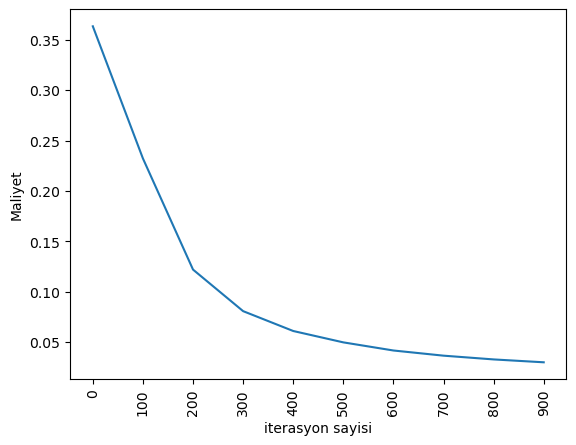

Eğitim doğruluğu: 99.07914053116242 %
Test doğruluğu: 99.01738473167045 %


In [151]:
def ikiKatmanNN(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
  
    # ilklendirme 
    parameters = layerSayisiniParametreleriIlklendir(x_train, y_train)
  
    for i in range(0, num_iterations):
        # ileri yayılım
        A2, cache = ileriYayilmaNN(x_train, parameters)
        # maliyet hesapla
        cost = maliyetHesaplaNN(A2, y_train, parameters)
        # geriye yayılım
        grads = geriyeYayilmaNN(parameters, cache, x_train, y_train)
        # parametreleri güncelle
        parameters = parametreGuncelleNN(parameters, grads)
    
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("iterasyon : %i, maliyet %f " % (i, cost))
    
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel("iterasyon sayisi")
    plt.ylabel("Maliyet")
    plt.show()
    
    # predict 
    y_prediction_test = tahminNN(parameters, x_test)
    y_prediction_train = tahminNN(parameters, x_train)
    
    # eğitim ve test doğruluğu
    print("Eğitim doğruluğu: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test doğruluğu: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters  
  
parameters = ikiKatmanNN(x_egitim, y_egitim, x_test, y_test, num_iterations=1000)
